[*********************100%***********************]  1 of 1 completed


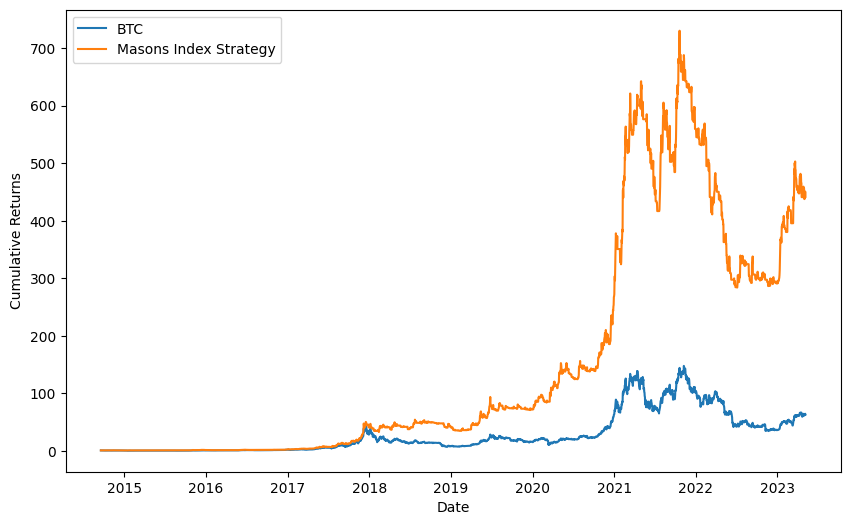

---- WITH THE MASONS ----
Annualized Return: 62.68%
Cumulative Return: 44044.16%
Annualized Volatility: 41.44%
Sharpe Ratio: 1.38
Sortino Ratio: 2.37
Max Drawdown: -61.11%
---- INDEX ----
Annualized Return: 39.29%
Cumulative Return: 6225.84%
Annualized Volatility: 60.23%
Sharpe Ratio: 0.85
Sortino Ratio: 1.25
Max Drawdown: -83.40%


In [12]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import empyrical as ep


# Download historical data for the ETFs
data = yf.download('BTC-USD')['Close']

def masons_index(prices, window=7):
    n = len(prices)
    masons_index = np.zeros(n)
    
    for k in range(window - 1, n):
        utility = 0
        for i in range(window):
            min_value = min(prices[k - i : k + 1])
            max_value = max(prices[k - i : k + 1])
            utility += np.log(prices[k] / max_value) + np.log(prices[k] / min_value)
        
        masons_index[k] = utility / window

    return masons_index

# Calculate the Masons Index for the downloaded data
data_masons_index = masons_index(data)

# Calculate the daily returns of the MSCI World ETF
data_returns = data.pct_change()

# Create a signal based on the Masons Index being positive or negative
masons_signal = pd.Series(data_masons_index > 0, index=data.index)

masons_signal.iloc[:7] = 0  # Set the signal to 0 for the first 252 days

# Apply the strategy by multiplying the daily returns by the Masons signal (shifted by 1 day to avoid lookahead bias)
strategy_returns = data_returns * masons_signal.shift(1)

# Calculate the cumulative returns of the strategy
cumulative_strategy_returns = (1 + strategy_returns).cumprod()

# Plot the MSCI World ETF's cumulative returns and the strategy's cumulative returns
fig, ax = plt.subplots(figsize=(10, 6))

data_cumulative_returns = (1 + data_returns).cumprod()
ax.plot(data_cumulative_returns.index, data_cumulative_returns, label='BTC')
ax.plot(cumulative_strategy_returns.index, cumulative_strategy_returns, label="Masons Index Strategy")
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')

plt.legend()
plt.show()

print("---- WITH THE MASONS ----")

# Fill missing values with zeros
strategy_returns = strategy_returns.fillna(0)
# Annualized return
annualized_return = ep.annual_return(strategy_returns)
print(f"Annualized Return: {annualized_return * 100:.2f}%")
# Cumulative return
cumulative_return = ep.cum_returns_final(strategy_returns)
print(f"Cumulative Return: {cumulative_return * 100:.2f}%")
# Annualized volatility
annualized_volatility = ep.annual_volatility(strategy_returns)
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")
# Sharpe ratio
sharpe_ratio = ep.sharpe_ratio(strategy_returns)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
# Sortino ratio
sortino_ratio = ep.sortino_ratio(strategy_returns)
print(f"Sortino Ratio: {sortino_ratio:.2f}")
# Max drawdown
max_drawdown = ep.max_drawdown(strategy_returns)
print(f"Max Drawdown: {max_drawdown * 100:.2f}%")

print("---- INDEX ----")

# Fill missing values with zeros
strategy_returns = data_returns.fillna(0)
# Annualized return
annualized_return = ep.annual_return(strategy_returns)
print(f"Annualized Return: {annualized_return * 100:.2f}%")
# Cumulative return
cumulative_return = ep.cum_returns_final(strategy_returns)
print(f"Cumulative Return: {cumulative_return * 100:.2f}%")
# Annualized volatility
annualized_volatility = ep.annual_volatility(strategy_returns)
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")
# Sharpe ratio
sharpe_ratio = ep.sharpe_ratio(strategy_returns)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
# Sortino ratio
sortino_ratio = ep.sortino_ratio(strategy_returns)
print(f"Sortino Ratio: {sortino_ratio:.2f}")
# Max drawdown
max_drawdown = ep.max_drawdown(strategy_returns)
print(f"Max Drawdown: {max_drawdown * 100:.2f}%")


[*********************100%***********************]  1 of 1 completed


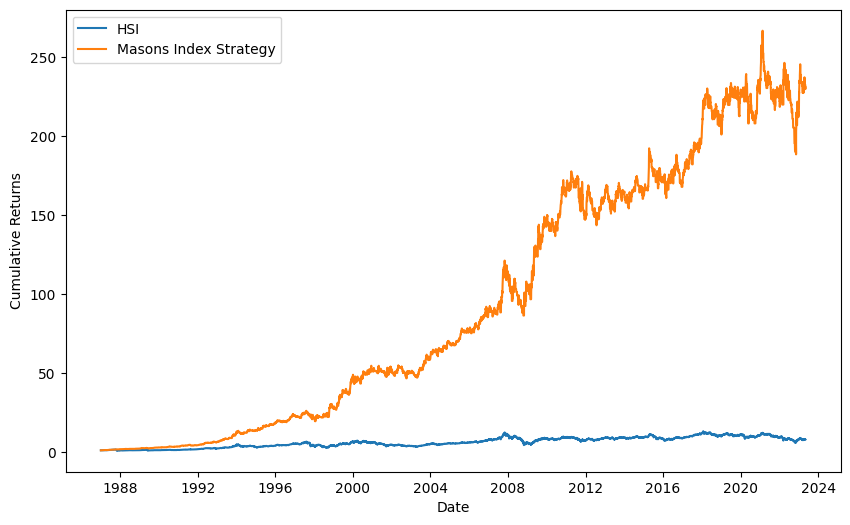

---- WITH THE MASONS ----
Annualized Return: 16.51%
Cumulative Return: 22973.81%
Annualized Volatility: 16.18%
Sharpe Ratio: 1.03
Sortino Ratio: 1.59
Max Drawdown: -29.35%
---- INDEX ----
Annualized Return: 5.94%
Cumulative Return: 680.65%
Annualized Volatility: 25.71%
Sharpe Ratio: 0.36
Sortino Ratio: 0.49
Max Drawdown: -65.18%
Optimal Window: 10
Best Sharpe Ratio: 1.03


In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import empyrical as ep


# Download historical data for the ETFs
data = yf.download('^HSI')['Close']

def masons_index(prices, window=10):
    n = len(prices)
    masons_index = np.zeros(n)
    
    for k in range(window - 1, n):
        utility = 0
        for i in range(window):
            min_value = min(prices[k - i : k + 1])
            max_value = max(prices[k - i : k + 1])
            utility += np.log(prices[k] / max_value) + np.log(prices[k] / min_value)
        
        masons_index[k] = utility / window

    return masons_index

# Calculate the Masons Index for the downloaded data
data_masons_index = masons_index(data)

# Calculate the daily returns of the MSCI World ETF
data_returns = data.pct_change()

# Create a signal based on the Masons Index being positive or negative
masons_signal = pd.Series(data_masons_index > 0, index=data.index)

masons_signal.iloc[:10] = 0  # Set the signal to 0 for the first 252 days

# Apply the strategy by multiplying the daily returns by the Masons signal (shifted by 1 day to avoid lookahead bias)
strategy_returns = data_returns * masons_signal.shift(1)

# Calculate the cumulative returns of the strategy
cumulative_strategy_returns = (1 + strategy_returns).cumprod()

# Plot the MSCI World ETF's cumulative returns and the strategy's cumulative returns
fig, ax = plt.subplots(figsize=(10, 6))

data_cumulative_returns = (1 + data_returns).cumprod()
ax.plot(data_cumulative_returns.index, data_cumulative_returns, label='HSI')
ax.plot(cumulative_strategy_returns.index, cumulative_strategy_returns, label="Masons Index Strategy")
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')

plt.legend()
plt.show()

print("---- WITH THE MASONS ----")

# Fill missing values with zeros
strategy_returns = strategy_returns.fillna(0)
# Annualized return
annualized_return = ep.annual_return(strategy_returns)
print(f"Annualized Return: {annualized_return * 100:.2f}%")
# Cumulative return
cumulative_return = ep.cum_returns_final(strategy_returns)
print(f"Cumulative Return: {cumulative_return * 100:.2f}%")
# Annualized volatility
annualized_volatility = ep.annual_volatility(strategy_returns)
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")
# Sharpe ratio
sharpe_ratio = ep.sharpe_ratio(strategy_returns)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
# Sortino ratio
sortino_ratio = ep.sortino_ratio(strategy_returns)
print(f"Sortino Ratio: {sortino_ratio:.2f}")
# Max drawdown
max_drawdown = ep.max_drawdown(strategy_returns)
print(f"Max Drawdown: {max_drawdown * 100:.2f}%")

print("---- INDEX ----")

# Fill missing values with zeros
strategy_returns = data_returns.fillna(0)
# Annualized return
annualized_return = ep.annual_return(strategy_returns)
print(f"Annualized Return: {annualized_return * 100:.2f}%")
# Cumulative return
cumulative_return = ep.cum_returns_final(strategy_returns)
print(f"Cumulative Return: {cumulative_return * 100:.2f}%")
# Annualized volatility
annualized_volatility = ep.annual_volatility(strategy_returns)
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")
# Sharpe ratio
sharpe_ratio = ep.sharpe_ratio(strategy_returns)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
# Sortino ratio
sortino_ratio = ep.sortino_ratio(strategy_returns)
print(f"Sortino Ratio: {sortino_ratio:.2f}")
# Max drawdown
max_drawdown = ep.max_drawdown(strategy_returns)
print(f"Max Drawdown: {max_drawdown * 100:.2f}%")



# Define a range of window values to test
window_values = range(5, 50)

# Initialize variables to store optimal values
best_window = None
best_sharpe_ratio = -np.inf

# Grid search over window values
for window in window_values:
    data_masons_index = masons_index(data, window=window)
    
    masons_signal = pd.Series(data_masons_index > 0, index=data.index)
    masons_signal.iloc[:window] = 0
    
    strategy_returns = data_returns * masons_signal.shift(1)
    strategy_returns = strategy_returns.fillna(0)
    
    sharpe_ratio = ep.sharpe_ratio(strategy_returns)
    
    if sharpe_ratio > best_sharpe_ratio:
        best_sharpe_ratio = sharpe_ratio
        best_window = window

print(f"Optimal Window: {best_window}")
print(f"Best Sharpe Ratio: {best_sharpe_ratio:.2f}")

[*********************100%***********************]  1 of 1 completed


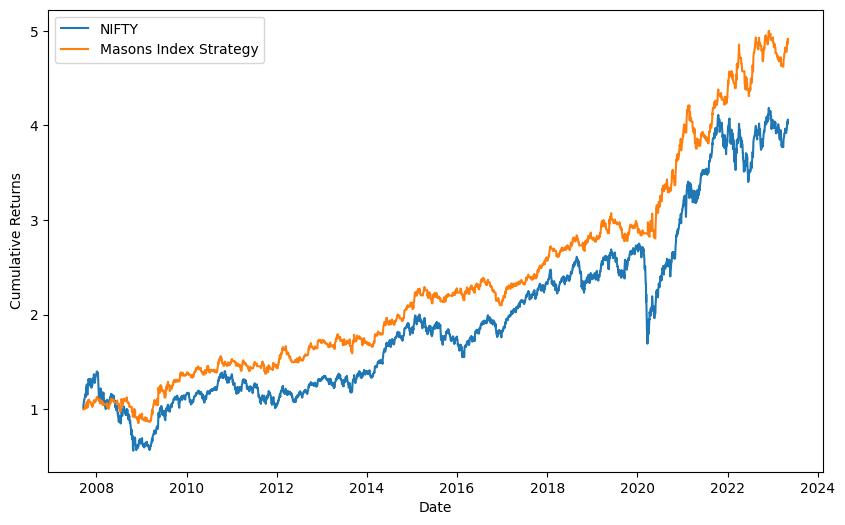

---- WITH THE MASONS ----
Annualized Return: 10.97%
Cumulative Return: 386.65%
Annualized Volatility: 14.18%
Sharpe Ratio: 0.80
Sortino Ratio: 1.22
Max Drawdown: -24.48%
---- INDEX ----
Annualized Return: 9.59%
Cumulative Return: 302.01%
Annualized Volatility: 21.85%
Sharpe Ratio: 0.53
Sortino Ratio: 0.76
Max Drawdown: -59.86%
Optimal Window: 9
Best Sharpe Ratio: 0.80


In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import empyrical as ep


# Download historical data for the ETFs
data = yf.download('^NSEI')['Close']

def masons_index(prices, window=9):
    n = len(prices)
    masons_index = np.zeros(n)
    
    for k in range(window - 1, n):
        utility = 0
        for i in range(window):
            min_value = min(prices[k - i : k + 1])
            max_value = max(prices[k - i : k + 1])
            utility += np.log(prices[k] / max_value) + np.log(prices[k] / min_value)
        
        masons_index[k] = utility / window

    return masons_index

# Calculate the Masons Index for the downloaded data
data_masons_index = masons_index(data)

# Calculate the daily returns of the MSCI World ETF
data_returns = data.pct_change()

# Create a signal based on the Masons Index being positive or negative
masons_signal = pd.Series(data_masons_index > 0, index=data.index)

masons_signal.iloc[:9] = 0  # Set the signal to 0 for the first 252 days

# Apply the strategy by multiplying the daily returns by the Masons signal (shifted by 1 day to avoid lookahead bias)
strategy_returns = data_returns * masons_signal.shift(1)

# Calculate the cumulative returns of the strategy
cumulative_strategy_returns = (1 + strategy_returns).cumprod()

# Plot the MSCI World ETF's cumulative returns and the strategy's cumulative returns
fig, ax = plt.subplots(figsize=(10, 6))

data_cumulative_returns = (1 + data_returns).cumprod()
ax.plot(data_cumulative_returns.index, data_cumulative_returns, label='NIFTY')
ax.plot(cumulative_strategy_returns.index, cumulative_strategy_returns, label="Masons Index Strategy")
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')

plt.legend()
plt.show()

print("---- WITH THE MASONS ----")

# Fill missing values with zeros
strategy_returns = strategy_returns.fillna(0)
# Annualized return
annualized_return = ep.annual_return(strategy_returns)
print(f"Annualized Return: {annualized_return * 100:.2f}%")
# Cumulative return
cumulative_return = ep.cum_returns_final(strategy_returns)
print(f"Cumulative Return: {cumulative_return * 100:.2f}%")
# Annualized volatility
annualized_volatility = ep.annual_volatility(strategy_returns)
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")
# Sharpe ratio
sharpe_ratio = ep.sharpe_ratio(strategy_returns)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
# Sortino ratio
sortino_ratio = ep.sortino_ratio(strategy_returns)
print(f"Sortino Ratio: {sortino_ratio:.2f}")
# Max drawdown
max_drawdown = ep.max_drawdown(strategy_returns)
print(f"Max Drawdown: {max_drawdown * 100:.2f}%")

print("---- INDEX ----")

# Fill missing values with zeros
strategy_returns = data_returns.fillna(0)
# Annualized return
annualized_return = ep.annual_return(strategy_returns)
print(f"Annualized Return: {annualized_return * 100:.2f}%")
# Cumulative return
cumulative_return = ep.cum_returns_final(strategy_returns)
print(f"Cumulative Return: {cumulative_return * 100:.2f}%")
# Annualized volatility
annualized_volatility = ep.annual_volatility(strategy_returns)
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")
# Sharpe ratio
sharpe_ratio = ep.sharpe_ratio(strategy_returns)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
# Sortino ratio
sortino_ratio = ep.sortino_ratio(strategy_returns)
print(f"Sortino Ratio: {sortino_ratio:.2f}")
# Max drawdown
max_drawdown = ep.max_drawdown(strategy_returns)
print(f"Max Drawdown: {max_drawdown * 100:.2f}%")



# Define a range of window values to test
window_values = range(5, 252)

# Initialize variables to store optimal values
best_window = None
best_sharpe_ratio = -np.inf

# Grid search over window values
for window in window_values:
    data_masons_index = masons_index(data, window=window)
    
    masons_signal = pd.Series(data_masons_index > 0, index=data.index)
    masons_signal.iloc[:window] = 0
    
    strategy_returns = data_returns * masons_signal.shift(1)
    strategy_returns = strategy_returns.fillna(0)
    
    sharpe_ratio = ep.sharpe_ratio(strategy_returns)
    
    if sharpe_ratio > best_sharpe_ratio:
        best_sharpe_ratio = sharpe_ratio
        best_window = window

print(f"Optimal Window: {best_window}")
print(f"Best Sharpe Ratio: {best_sharpe_ratio:.2f}")

[*********************100%***********************]  1 of 1 completed


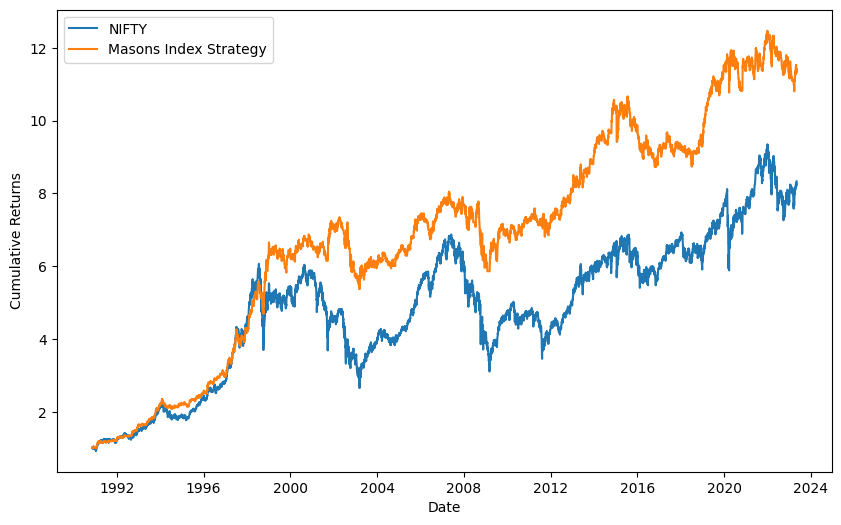

---- WITH THE MASONS ----
Annualized Return: 7.81%
Cumulative Return: 1041.97%
Annualized Volatility: 11.26%
Sharpe Ratio: 0.72
Sortino Ratio: 1.04
Max Drawdown: -27.17%
---- INDEX ----
Annualized Return: 6.76%
Cumulative Return: 732.98%
Annualized Volatility: 17.76%
Sharpe Ratio: 0.46
Sortino Ratio: 0.65
Max Drawdown: -56.31%


In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import empyrical as ep


# Download historical data for the ETFs
data = yf.download('^SSMI')['Close']

def masons_index(prices, window=10):
    n = len(prices)
    masons_index = np.zeros(n)
    
    for k in range(window - 1, n):
        utility = 0
        for i in range(window):
            min_value = min(prices[k - i : k + 1])
            max_value = max(prices[k - i : k + 1])
            utility += np.log(prices[k] / max_value) + np.log(prices[k] / min_value)
        
        masons_index[k] = utility / window

    return masons_index

# Calculate the Masons Index for the downloaded data
data_masons_index = masons_index(data)

# Calculate the daily returns of the MSCI World ETF
data_returns = data.pct_change()

# Create a signal based on the Masons Index being positive or negative
masons_signal = pd.Series(data_masons_index > 0, index=data.index)

masons_signal.iloc[:10] = 0  # Set the signal to 0 for the first 252 days

# Apply the strategy by multiplying the daily returns by the Masons signal (shifted by 1 day to avoid lookahead bias)
strategy_returns = data_returns * masons_signal.shift(1)

# Calculate the cumulative returns of the strategy
cumulative_strategy_returns = (1 + strategy_returns).cumprod()

# Plot the MSCI World ETF's cumulative returns and the strategy's cumulative returns
fig, ax = plt.subplots(figsize=(10, 6))

data_cumulative_returns = (1 + data_returns).cumprod()
ax.plot(data_cumulative_returns.index, data_cumulative_returns, label='SSMI')
ax.plot(cumulative_strategy_returns.index, cumulative_strategy_returns, label="Masons Index Strategy")
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')

plt.legend()
plt.show()

print("---- WITH THE MASONS ----")

# Fill missing values with zeros
strategy_returns = strategy_returns.fillna(0)
# Annualized return
annualized_return = ep.annual_return(strategy_returns)
print(f"Annualized Return: {annualized_return * 100:.2f}%")
# Cumulative return
cumulative_return = ep.cum_returns_final(strategy_returns)
print(f"Cumulative Return: {cumulative_return * 100:.2f}%")
# Annualized volatility
annualized_volatility = ep.annual_volatility(strategy_returns)
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")
# Sharpe ratio
sharpe_ratio = ep.sharpe_ratio(strategy_returns)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
# Sortino ratio
sortino_ratio = ep.sortino_ratio(strategy_returns)
print(f"Sortino Ratio: {sortino_ratio:.2f}")
# Max drawdown
max_drawdown = ep.max_drawdown(strategy_returns)
print(f"Max Drawdown: {max_drawdown * 100:.2f}%")

print("---- INDEX ----")

# Fill missing values with zeros
strategy_returns = data_returns.fillna(0)
# Annualized return
annualized_return = ep.annual_return(strategy_returns)
print(f"Annualized Return: {annualized_return * 100:.2f}%")
# Cumulative return
cumulative_return = ep.cum_returns_final(strategy_returns)
print(f"Cumulative Return: {cumulative_return * 100:.2f}%")
# Annualized volatility
annualized_volatility = ep.annual_volatility(strategy_returns)
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")
# Sharpe ratio
sharpe_ratio = ep.sharpe_ratio(strategy_returns)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
# Sortino ratio
sortino_ratio = ep.sortino_ratio(strategy_returns)
print(f"Sortino Ratio: {sortino_ratio:.2f}")
# Max drawdown
max_drawdown = ep.max_drawdown(strategy_returns)
print(f"Max Drawdown: {max_drawdown * 100:.2f}%")


In [ ]:
# Define a range of window values to test
window_values = range(5, 252)

# Initialize variables to store optimal values
best_window = None
best_sharpe_ratio = -np.inf

# Grid search over window values
for window in window_values:
    data_masons_index = masons_index(data, window=window)
    
    masons_signal = pd.Series(data_masons_index > 0, index=data.index)
    masons_signal.iloc[:window] = 0
    
    strategy_returns = data_returns * masons_signal.shift(1)
    strategy_returns = strategy_returns.fillna(0)
    
    sharpe_ratio = ep.sharpe_ratio(strategy_returns)
    
    if sharpe_ratio > best_sharpe_ratio:
        best_sharpe_ratio = sharpe_ratio
        best_window = window

print(f"Optimal Window: {best_window}")
print(f"Best Sharpe Ratio: {best_sharpe_ratio:.2f}")

[*********************100%***********************]  1 of 1 completed


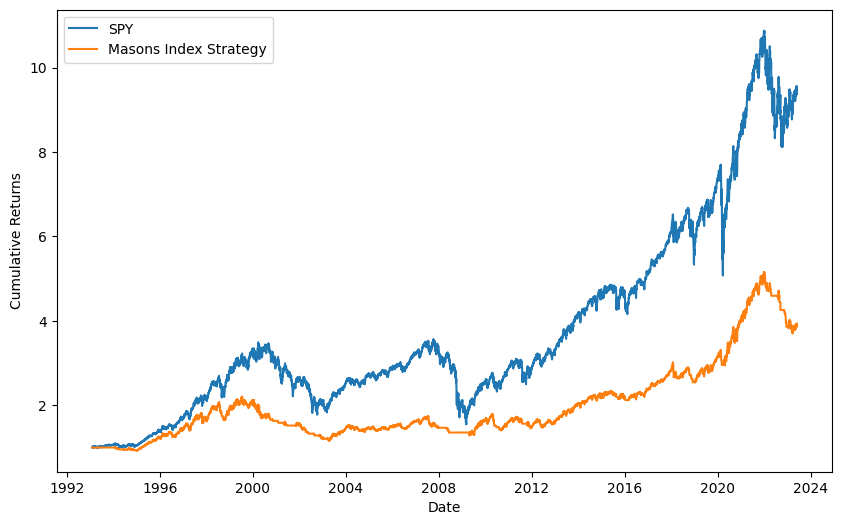

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import empyrical as ep


# Download historical data for the ETFs
data = yf.download('SPY')['Close']

def masons_index(prices, window=252):
    n = len(prices)
    masons_index = np.zeros(n)
    
    for k in range(window, n):
        utility = 0
        for i in range(window):
            min_value = min(prices[k - window + i : k + 1])
            max_value = max(prices[k - window + i : k + 1])
            utility += np.log(prices[k] / max_value) + np.log(prices[k] / min_value)
        
        masons_index[k] = utility / window

    return masons_index


# Calculate the Masons Index for the downloaded data
data_masons_index = masons_index(data)

# Calculate the daily returns of the MSCI World ETF
data_returns = data.pct_change()

# Create a signal based on the Masons Index being positive or negative
masons_signal = pd.Series(data_masons_index > 0, index=data.index)

masons_signal.iloc[:252] = 0  # Set the signal to 0 for the first 252 days

# Apply the strategy by multiplying the daily returns by the Masons signal (shifted by 1 day to avoid lookahead bias)
strategy_returns = data_returns * masons_signal.shift(1)

# Calculate the cumulative returns of the strategy
cumulative_strategy_returns = (1 + strategy_returns).cumprod()

# Plot the MSCI World ETF's cumulative returns and the strategy's cumulative returns
fig, ax = plt.subplots(figsize=(10, 6))

data_cumulative_returns = (1 + data_returns).cumprod()
ax.plot(data_cumulative_returns.index, data_cumulative_returns, label='SPY')
ax.plot(cumulative_strategy_returns.index, cumulative_strategy_returns, label="Masons Index Strategy")
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')

plt.legend()
plt.show()
